In [ ]:
"""
*****************************[ J ]****************************************
Jefferson de Almeida. 
Eng.Produção
*************************************************************************
"""

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

In [56]:
df = pd.read_excel('Student-Employability-Datasets.xlsx', index_col='Name of Student')
df.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
Name of Student,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,Employable
Student 2,4,4,4,4,4,4,3,5,Employable
Student 3,4,3,3,3,3,3,2,5,LessEmployable
Student 4,3,3,3,2,3,3,3,5,LessEmployable
Student 5,4,4,3,3,4,4,3,5,Employable


## 1.0 - Análise exploratória dos dados.
    Informações sobre o dataframe.
    Observar se existe valores nulos.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2982 entries, Student 1 to Student 3000
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   GENERAL APPEARANCE          2982 non-null   int64 
 1   MANNER OF SPEAKING          2982 non-null   int64 
 2   PHYSICAL CONDITION          2982 non-null   int64 
 3   MENTAL ALERTNESS            2982 non-null   int64 
 4   SELF-CONFIDENCE             2982 non-null   int64 
 5   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 6   COMMUNICATION SKILLS        2982 non-null   int64 
 7   Student Performance Rating  2982 non-null   int64 
 8   CLASS                       2982 non-null   object
dtypes: int64(8), object(1)
memory usage: 233.0+ KB


In [58]:
df.isnull().sum()

GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [65]:
df.shape

(2982, 9)

In [59]:
df['CLASS'].unique()
# Como só tem dois valores, este será nossa label que iremos prever.

array(['Employable', 'LessEmployable'], dtype=object)

In [60]:
df['CLASS'].describe()

count           2982
unique             2
top       Employable
freq            1729
Name: CLASS, dtype: object

In [61]:
df.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [62]:
df.corr()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
GENERAL APPEARANCE,1.000000,0.406823,0.468731,0.495937,0.480360,0.406541,0.371028,-0.087379
MANNER OF SPEAKING,0.406823,1.000000,0.551092,0.617226,0.549424,0.726366,0.622969,0.072317
PHYSICAL CONDITION,0.468731,0.551092,1.000000,0.634661,0.663473,0.570402,0.513667,0.041437
MENTAL ALERTNESS,0.495937,0.617226,0.634661,1.000000,0.675185,0.662191,0.630505,0.073547
SELF-CONFIDENCE,0.480360,0.549424,0.663473,0.675185,1.000000,0.587900,0.577251,-0.068683
ABILITY TO PRESENT IDEAS,0.406541,0.726366,0.570402,0.662191,0.587900,1.000000,0.647501,0.192467
COMMUNICATION SKILLS,0.371028,0.622969,0.513667,0.630505,0.577251,0.647501,1.000000,0.048223
Student Performance Rating,-0.087379,0.072317,0.041437,0.073547,-0.068683,0.192467,0.048223,1.000000


## 2.0 Análise gráfica dos dados.

#### 2.1 - GENERAL APPEARANCE
#### 2.2 - MANNER OF SPEAKING
#### 2.3 - PHYSICAL CONDITION
#### 2.4 - MENTAL ALERTNESS
#### 2.5 - SELF-CONFIDENCE
#### 2.6 - ABILITY TO PRESENT IDEAS
#### 2.7 - COMMUNICATION SKILLS
#### 2.8 - Student Performance Rating
#### 2.8 - CLASS


In [66]:
df.columns

Index(['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION',
       'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS',
       'COMMUNICATION SKILLS', 'Student Performance Rating', 'CLASS'],
      dtype='object')

#### 2.1 - GENERAL APPEARANCE

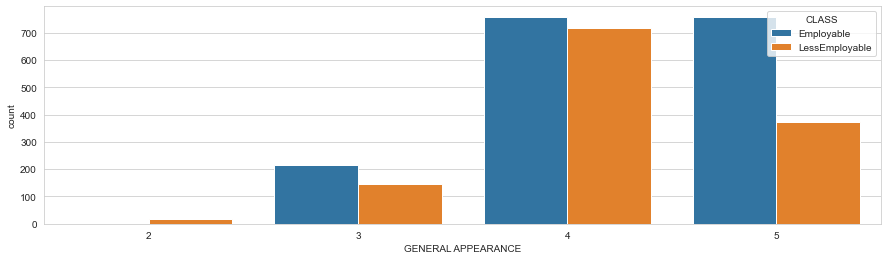

In [67]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.countplot(data=df, x='GENERAL APPEARANCE',hue='CLASS',dodge=True)

plt.show()
# Com o argumento dogge = true, mostra as barras separadas.


<AxesSubplot:ylabel='GENERAL APPEARANCE'>

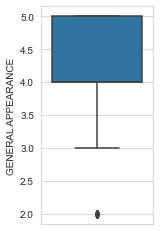

In [68]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='GENERAL APPEARANCE', hue='CLASS')

#### 2.2 - MANNER OF SPEAKING

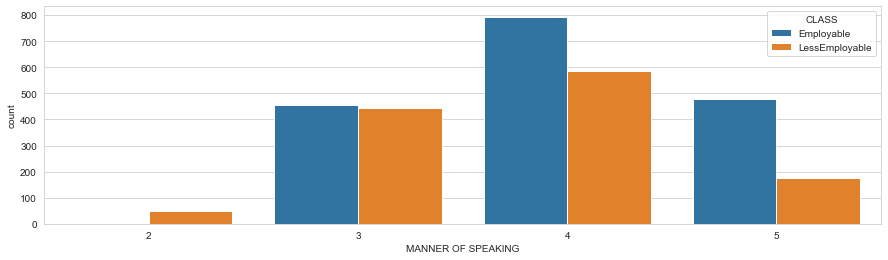

In [69]:
fig, ax = plt.subplots(figsize = (15, 4))
sns.countplot(data=df, x='MANNER OF SPEAKING',hue='CLASS',dodge=True)
plt.show()

<AxesSubplot:ylabel='MANNER OF SPEAKING'>

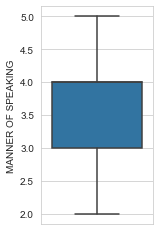

In [70]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='MANNER OF SPEAKING', hue='CLASS')

#### 2.3 - PHYSICAL CONDITION

<AxesSubplot:xlabel='PHYSICAL CONDITION', ylabel='count'>

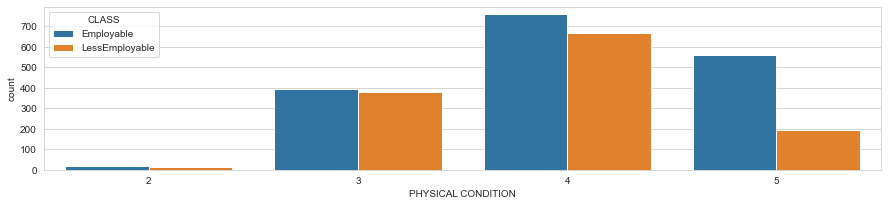

In [71]:
fig, ax = plt.subplots(figsize = (15, 3))
sns.countplot(data=df, x='PHYSICAL CONDITION',hue='CLASS')

<AxesSubplot:ylabel='PHYSICAL CONDITION'>

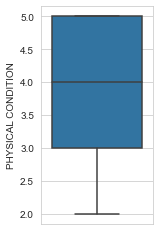

In [72]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='PHYSICAL CONDITION')

#### 2.4 - MENTAL ALERTNESS

<AxesSubplot:xlabel='MENTAL ALERTNESS', ylabel='count'>

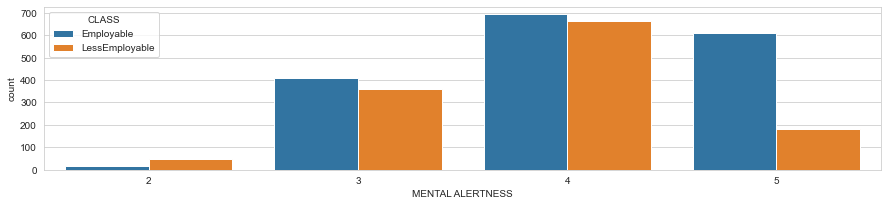

In [73]:
fig, ax = plt.subplots(figsize = (15, 3))
sns.countplot(data=df, x='MENTAL ALERTNESS',hue='CLASS')

<AxesSubplot:ylabel='MENTAL ALERTNESS'>

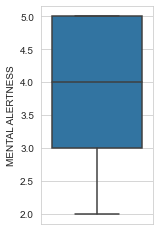

In [74]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='MENTAL ALERTNESS')

#### 2.5 - SELF-CONFIDENCE

<AxesSubplot:xlabel='SELF-CONFIDENCE', ylabel='count'>

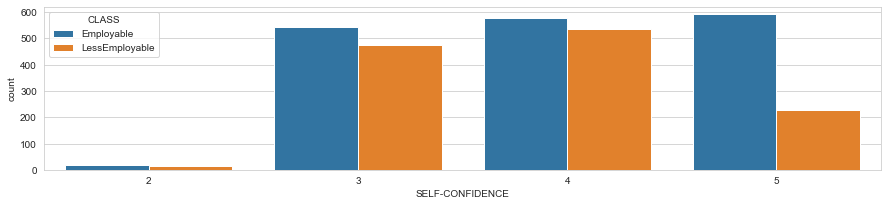

In [75]:
fig, ax = plt.subplots(figsize = (15, 3))
sns.countplot(data=df, x='SELF-CONFIDENCE',hue='CLASS')

<AxesSubplot:ylabel='SELF-CONFIDENCE'>

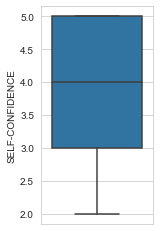

In [76]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='SELF-CONFIDENCE')

#### 2.6 - ABILITY TO PRESENT IDEAS

<AxesSubplot:xlabel='ABILITY TO PRESENT IDEAS', ylabel='count'>

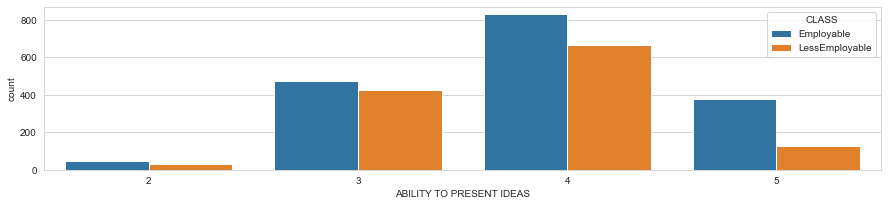

In [77]:
fig, ax = plt.subplots(figsize = (15, 3))
sns.countplot(data=df, x='ABILITY TO PRESENT IDEAS',hue='CLASS')

<AxesSubplot:ylabel='ABILITY TO PRESENT IDEAS'>

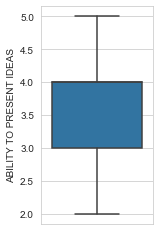

In [78]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='ABILITY TO PRESENT IDEAS')

#### 2.7 - COMMUNICATION SKILLS

<AxesSubplot:xlabel='COMMUNICATION SKILLS', ylabel='count'>

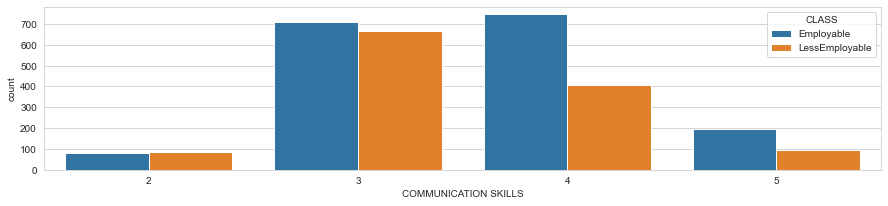

In [79]:
fig, ax = plt.subplots(figsize = (15, 3))
sns.countplot(data=df, x='COMMUNICATION SKILLS',hue='CLASS')

<AxesSubplot:ylabel='COMMUNICATION SKILLS'>

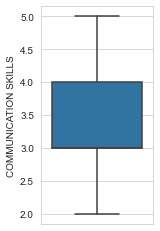

In [80]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='COMMUNICATION SKILLS')

#### 2.8 - Student Performance Rating

<AxesSubplot:xlabel='Student Performance Rating', ylabel='count'>

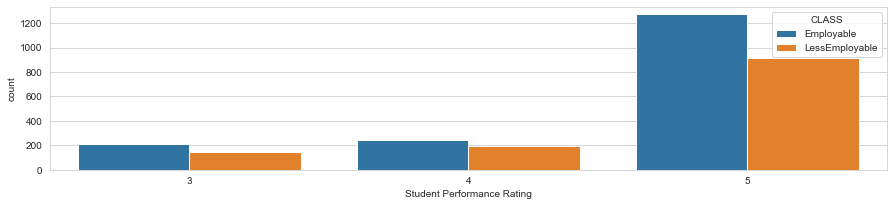

In [81]:
fig, ax = plt.subplots(figsize = (15, 3))
sns.countplot(data=df, x='Student Performance Rating',hue='CLASS')

<AxesSubplot:ylabel='Student Performance Rating'>

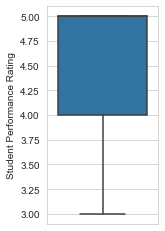

In [82]:
fig, ax = plt.subplots(figsize = (2, 4))
sns.boxplot(data=df, y='Student Performance Rating')

#### 2.8 - CLASS
#### 2.8.1 - Transformando a coluna CLASS categórica para valores BINÁRIOS(0 ou 1).
    Porque a coluna CLASS será nossa variável de predição.

In [83]:
df['CLASS'].unique()

array(['Employable', 'LessEmployable'], dtype=object)

In [84]:
df['CLASS'] = df['CLASS'].map({'Employable': 1, 'LessEmployable' : 0})
df.head(2)

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
Name of Student,,,,,,,,,
Student 1,4,5,4,5,5,5,5,5,1
Student 2,4,4,4,4,4,4,3,5,1


In [85]:
df.shape

(2982, 9)

In [86]:
df['CLASS']

Name of Student
Student 1       1
Student 2       1
Student 3       0
Student 4       0
Student 5       1
               ..
Student 2996    1
Student 2997    1
Student 2998    1
Student 2999    0
Student 3000    1
Name: CLASS, Length: 2982, dtype: int64

In [88]:
df['CLASS'].shape

(2982,)

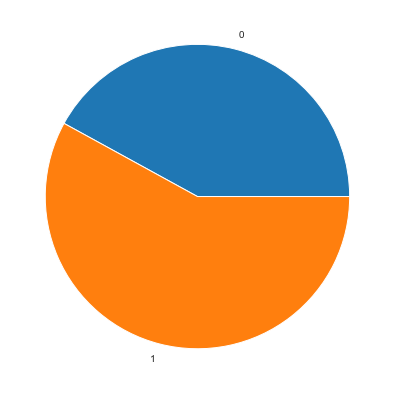

In [89]:
fig, ax = plt.subplots(figsize = (10,7))

df.groupby('CLASS').size().plot(kind='pie', ylabel='', ax=ax)
plt.show()

## 3.0 Preparação para os modelos de MACHINE LEARN.

In [90]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [91]:
y

Name of Student
Student 1       1
Student 2       1
Student 3       0
Student 4       0
Student 5       1
               ..
Student 2996    1
Student 2997    1
Student 2998    1
Student 2999    0
Student 3000    1
Name: CLASS, Length: 2982, dtype: int64

In [92]:
X.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
Name of Student,,,,,,,,
Student 1,4,5,4,5,5,5,5,5
Student 2,4,4,4,4,4,4,3,5
Student 3,4,3,3,3,3,3,2,5
Student 4,3,3,3,2,3,3,3,5
Student 5,4,4,3,3,4,4,3,5


In [93]:
X.shape

(2982, 8)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
axu1 = list(X_train.shape)
axu2 = list(X_test.shape)
aux3 = list(y_train.shape)
aux4 = list(y_test.shape)

In [102]:
print(f'X traino : ', axu1)
print(f'X Teste : ', axu2)
print(f'Y traino : ', aux3)
print(f'Y Teste : ',aux4)

X traino :  [2087, 8]
X Teste :  [895, 8]
Y traino :  [2087]
Y Teste :  [895]


In [96]:
from sklearn.ensemble import RandomForestClassifier # Deu certo
from sklearn.tree import DecisionTreeClassifier # Deu certo

# 3.1 - RandomForestClassifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
mod_RFC = RandomForestClassifier()

In [39]:
mod_RFC.fit(X_train,y_train)

RandomForestClassifier()

In [40]:
acuracia = round(mod_RFC.score(X_train, y_train) * 100, 2)

In [41]:
train_pred_RFC = model_selection.cross_val_predict(RandomForestClassifier(), X_train, y_train, cv = 15, n_jobs = -1)

In [42]:
acuracia_vc = round(metrics.accuracy_score(y_train, train_pred_RFC) * 100, 2)

In [46]:
print(f'Acurácia: {acuracia} %')
print(f'Acurácia validação Cruzada : {acuracia_vc} %')

Acurácia: 92.24 %
Acurácia validação Cruzada : 91.47 %


# 3.2 - DecisionTreeClassifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
mod_DC = DecisionTreeClassifier()

mod_DC.fit(X_train,y_train)

acuracia_DC = round(mod_DC.score(X_train, y_train) * 100, 2)

train_pred_DC = model_selection.cross_val_predict(DecisionTreeClassifier(), X_train, y_train, cv = 11, n_jobs = -1)

acuracia_vc_DC = round(metrics.accuracy_score(y_train, train_pred_DC) * 100, 2)

print(f'Acurácia: {acuracia_DC} %')
print(f'Acurácia validação Cruzada : {acuracia_vc_DC} %')


Acurácia: 92.24 %
Acurácia validação Cruzada : 91.57 %


In [116]:
y_theta1 = pd.Series(mod_DC.predict(X_train))

In [117]:
y_theta1.shape

(2087,)

In [118]:
y_theta1

0       0
1       1
2       1
3       0
4       1
       ..
2082    1
2083    0
2084    0
2085    1
2086    1
Length: 2087, dtype: int64

In [119]:
y_theta2 = pd.Series(mod_DC.predict(X_test))
y_theta2.shape

(895,)

In [122]:
y_label = pd.concat([y_theta1, y_theta2])
y_label.shape

(2982,)